In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

# Loss Function: $L(w) \equiv\prod _{ n=1 }^{ 4 }{ \left[ \cos { \left( \frac { n\pi w }{ 2 }  \right)  } \cosh { w } +\sin { \left( \frac { n\pi w }{ 2 }  \right)  } \sinh { w }  \right]  } $

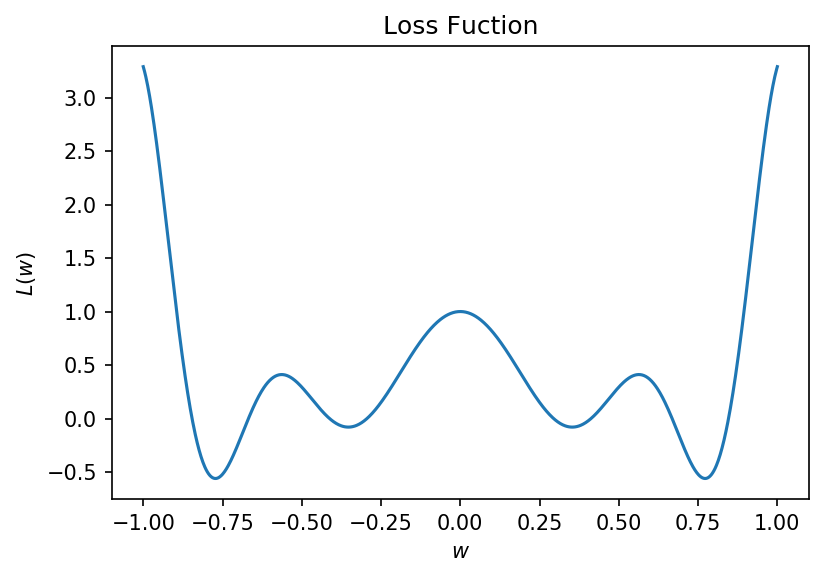

In [2]:
def L(w):
    '''L can only take a number, a 1-D array, or a (1,n) array as its input argument.'''
    n = np.arange(1,5).reshape(4,1)
    return (np.cos(n*np.pi*w/2)*np.cosh(w) + np.sin(n*np.pi*w/2)*np.sinh(w)).prod(axis=0)

x = np.linspace(-1,1,1000)
plt.figure(figsize=(6,4), dpi=150)
plt.plot(x, L(x))
plt.xlabel('$w$')
plt.ylabel('$L(w)$')
plt.title('Loss Fuction')
plt.show()

# Gradient Descent: $w'=w-\eta\frac{dL}{dw}$

In [3]:
def Lprime(w):
    '''Lprime only take a number as its input argument.'''
    return misc.derivative(L, w, 1e-5)

def GD(w, η=0.001):
    '''GD only take numbers as its input arguments.'''
    points = np.array([w])
    while True:
        w -= η*Lprime(w)
        points = np.append(points, w)
        if abs(points[-1]-points[-2]) < 1e-5:
            break
    return points

### initial point $w_0=1$

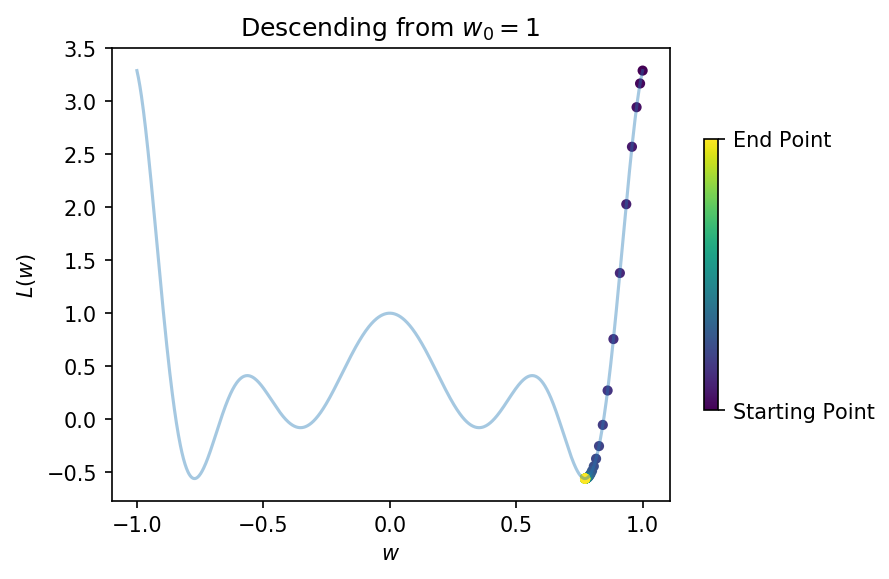

In [4]:
w0 = 1

plt.figure(figsize=(6,4), dpi=150)

x = np.linspace(-1,1,1000)
plt.plot(x, L(x), alpha=0.4)

tread = GD(w0)
plt.scatter(tread, L(tread), c=np.arange(tread.size)/(tread.size-1), cmap='viridis', s=15)

plt.xlabel('$w$')
plt.ylabel('$L(w)$')
plt.title('Descending from $w_0=%g$'%w0)

cbar = plt.colorbar(shrink=0.6)
cbar.set_ticks([0,1])
cbar.set_ticklabels(['Starting Point','End Point'])

plt.show()

### initial point $w_0=-0.5$
The problem here is that $w$ stops at a **local minimum** of $L$, but not at its **global minimum**.

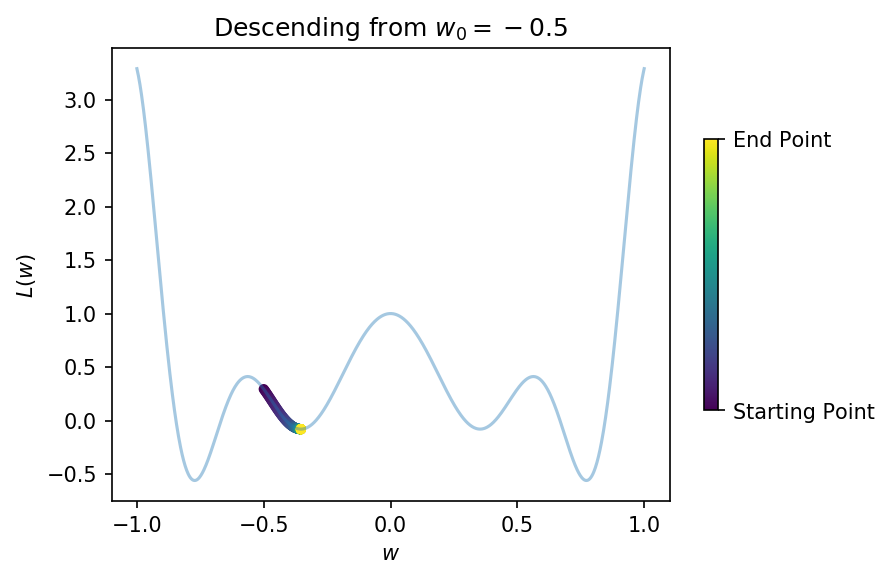

In [5]:
w0 = -0.5

plt.figure(figsize=(6,4), dpi=150)

x = np.linspace(-1,1,1000)
plt.plot(x, L(x), alpha=0.4)

tread = GD(w0)
plt.scatter(tread, L(tread), c=np.arange(tread.size)/(tread.size-1), cmap='viridis', s=15)

plt.xlabel('$w$')
plt.ylabel('$L(w)$')
plt.title('Descending from $w_0=%g$'%w0)

cbar = plt.colorbar(shrink=0.6)
cbar.set_ticks([0,1])
cbar.set_ticklabels(['Starting Point','End Point'])

plt.show()

### initial point $w_0=0$
The problem here is that if $w$ starts at a maximum of $L$, it stays here thereafter. Generally, if $w$ starts at any stationary points of $L$, i.e., $L'(w_0)=0$, it stays where it starts.

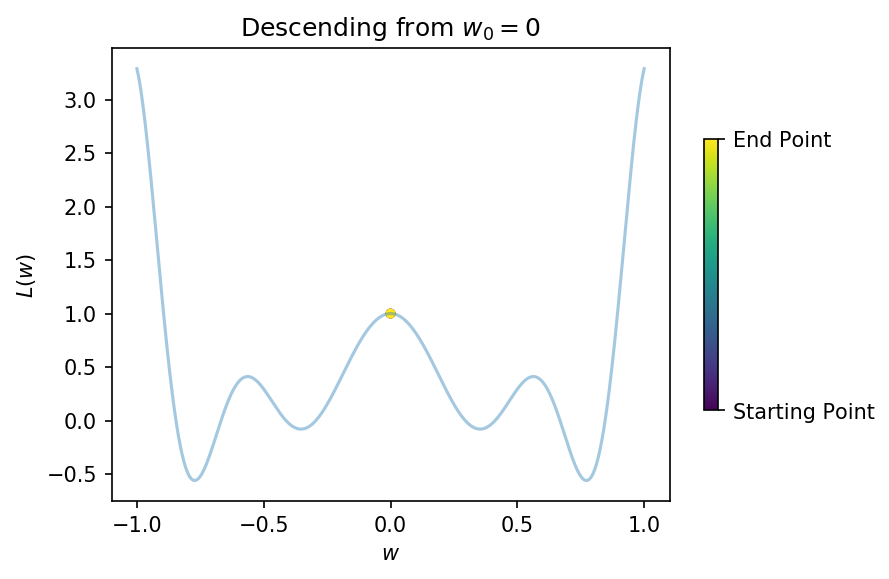

In [6]:
w0 = 0

plt.figure(figsize=(6,4), dpi=150)

x = np.linspace(-1,1,1000)
plt.plot(x, L(x), alpha=0.4)

tread = GD(w0)
plt.scatter(tread, L(tread), c=np.arange(tread.size)/(tread.size-1), cmap='viridis', s=15)

plt.xlabel('$w$')
plt.ylabel('$L(w)$')
plt.title('Descending from $w_0=%g$'%w0)

cbar = plt.colorbar(shrink=0.6)
cbar.set_ticks([0,1])
cbar.set_ticklabels(['Starting Point','End Point'])

plt.show()

### random initial points

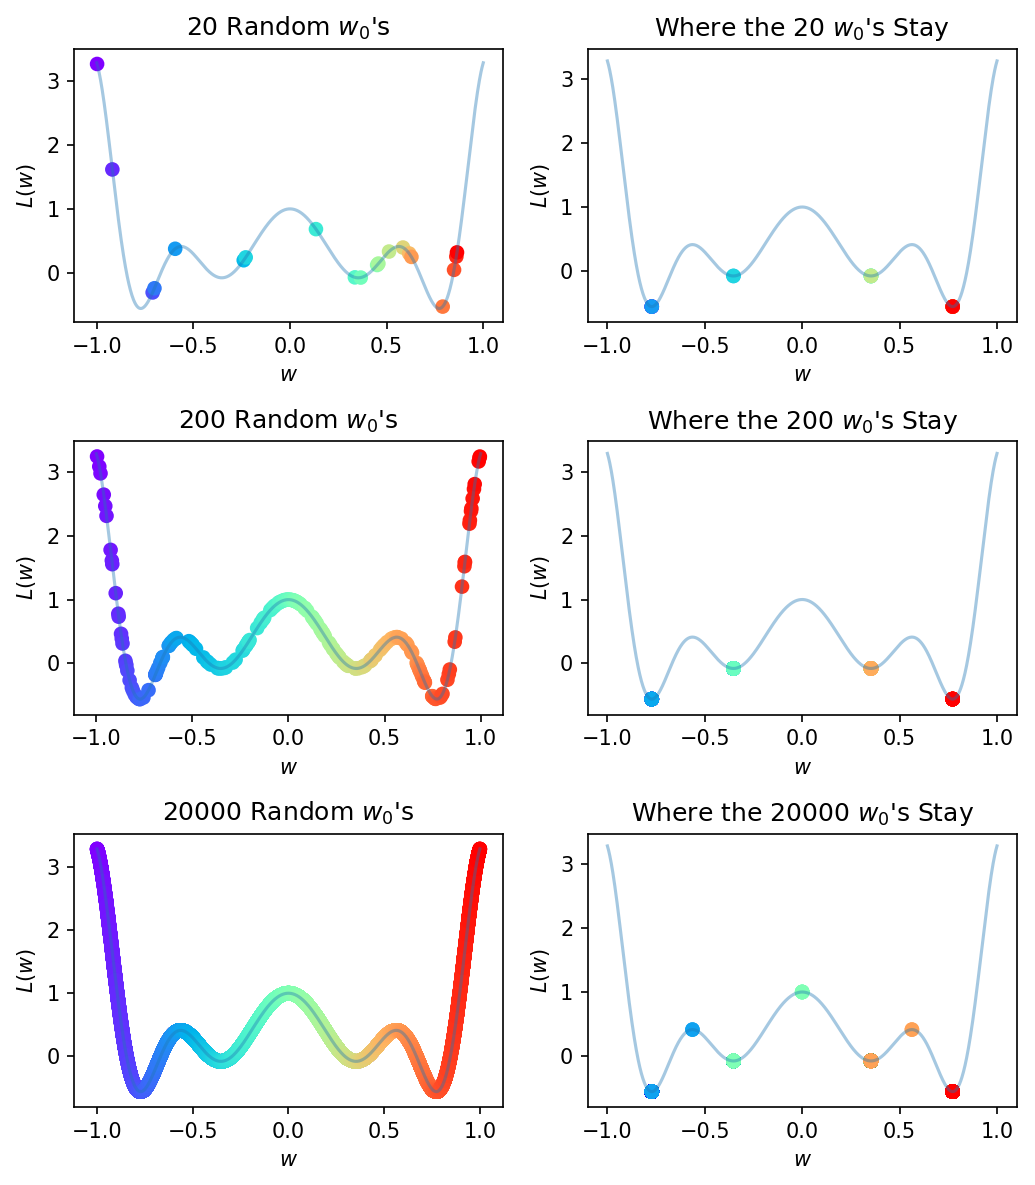

In [7]:
fig, [[ax1,ax2], [ax3,ax4], [ax5,ax6]] = plt.subplots(3, 2, figsize=(7,8), dpi=150)

def rand_w0(n):
    init_points = -1 + 2*np.random.rand(n)
    return np.sort(init_points)

x = np.linspace(-1,1,1000)

n = 20
w0 = rand_w0(n)
ax1.plot(x, L(x), alpha=0.4)
ax1.scatter(w0, L(w0), c=np.arange(w0.size)/(w0.size-1), cmap='rainbow')
ax1.set_xlabel('$w$')
ax1.set_ylabel('$L(w)$')
ax1.set_title('%d Random $w_0$\'s'%n)

w = np.array([GD(i)[-1] for i in w0])
ax2.plot(x, L(x), alpha=0.4)
ax2.scatter(w, L(w), c=np.arange(w.size)/(w.size-1), cmap='rainbow')
ax2.set_xlabel('$w$')
ax2.set_ylabel('$L(w)$')
ax2.set_title('Where the %d $w_0$\'s Stay'%n)

n = 200
w0 = rand_w0(n)
ax3.plot(x, L(x), alpha=0.4)
ax3.scatter(w0, L(w0), c=np.arange(w0.size)/(w0.size-1), cmap='rainbow')
ax3.set_xlabel('$w$')
ax3.set_ylabel('$L(w)$')
ax3.set_title('%d Random $w_0$\'s'%n)

w = np.array([GD(i)[-1] for i in w0])
ax4.plot(x, L(x), alpha=0.4)
ax4.scatter(w, L(w), c=np.arange(w.size)/(w.size-1), cmap='rainbow')
ax4.set_xlabel('$w$')
ax4.set_ylabel('$L(w)$')
ax4.set_title('Where the %d $w_0$\'s Stay'%n)

n = 20000
w0 = rand_w0(n)
ax5.plot(x, L(x), alpha=0.4)
ax5.scatter(w0, L(w0), c=np.arange(w0.size)/(w0.size-1), cmap='rainbow')
ax5.set_xlabel('$w$')
ax5.set_ylabel('$L(w)$')
ax5.set_title('%d Random $w_0$\'s'%n)

w = np.array([GD(i)[-1] for i in w0])
ax6.plot(x, L(x), alpha=0.4)
ax6.scatter(w, L(w), c=np.arange(w.size)/(w.size-1), cmap='rainbow')
ax6.set_xlabel('$w$')
ax6.set_ylabel('$L(w)$')
ax6.set_title('Where the %d $w_0$\'s Stay'%n)

plt.tight_layout()
plt.show()